<h1><strong> Data Processing </strong></h1>

In [1]:
import pandas as pd
import numpy as np

In [2]:
energy = pd.read_csv("train_energy_data.csv")
energy.head()

,Building Type,Square Footage,Number of Occupants,Appliances Used,Average Temperature,Day of Week,Energy Consumption
0,Residential,7063,76,10,29.84,Weekday,2713.95
1,Commercial,44372,66,45,16.72,Weekday,5744.99
2,Industrial,19255,37,17,14.30,Weekend,4101.24
3,Residential,13265,14,41,32.82,Weekday,3009.14
4,Commercial,13375,26,18,11.92,Weekday,3279.17


<h1><strong> EDA </strong></h1>
<p>This section provides an exploratory data analysis (EDA) of the dataset.</p>

In [3]:
energy.isna().sum()

Building Type          0
Square Footage         0
Number of Occupants    0
Appliances Used        0
Average Temperature    0
Day of Week            0
Energy Consumption     0
dtype: int64

<strong> No missing Value </strong>

In [4]:
energy.duplicated().sum()

0

<strong> No duplicated Value </strong>

<h2><strong> <li> Check Statistics </li> </strong><h2>

In [5]:
# do some statistics
energy.describe()

,Square Footage,Number of Occupants,Appliances Used,Average Temperature,Energy Consumption
count,1000.000,1000.000000,1000.000000,1000.000000,1000.000000
mean,25462.388,48.372000,25.606000,22.611390,4166.252570
std,14294.554,29.061972,14.105166,7.139943,933.313064
min,560.000,1.000000,1.000000,10.050000,1683.950000
25%,13169.750,22.000000,13.000000,16.475000,3509.482500
50%,25477.000,47.000000,26.000000,22.815000,4175.730000
75%,37446.250,73.250000,38.000000,28.850000,4863.850000
max,49997.000,99.000000,49.000000,34.990000,6530.600000


In [6]:
# Define feature and target

X_feature = energy[["Square Footage", "Number of Occupants", "Appliances Used", "Average Temperature"]].values
y_target = energy["Energy Consumption"].values

<h2><strong> <li> Visualize the graph </li> </strong><h2>

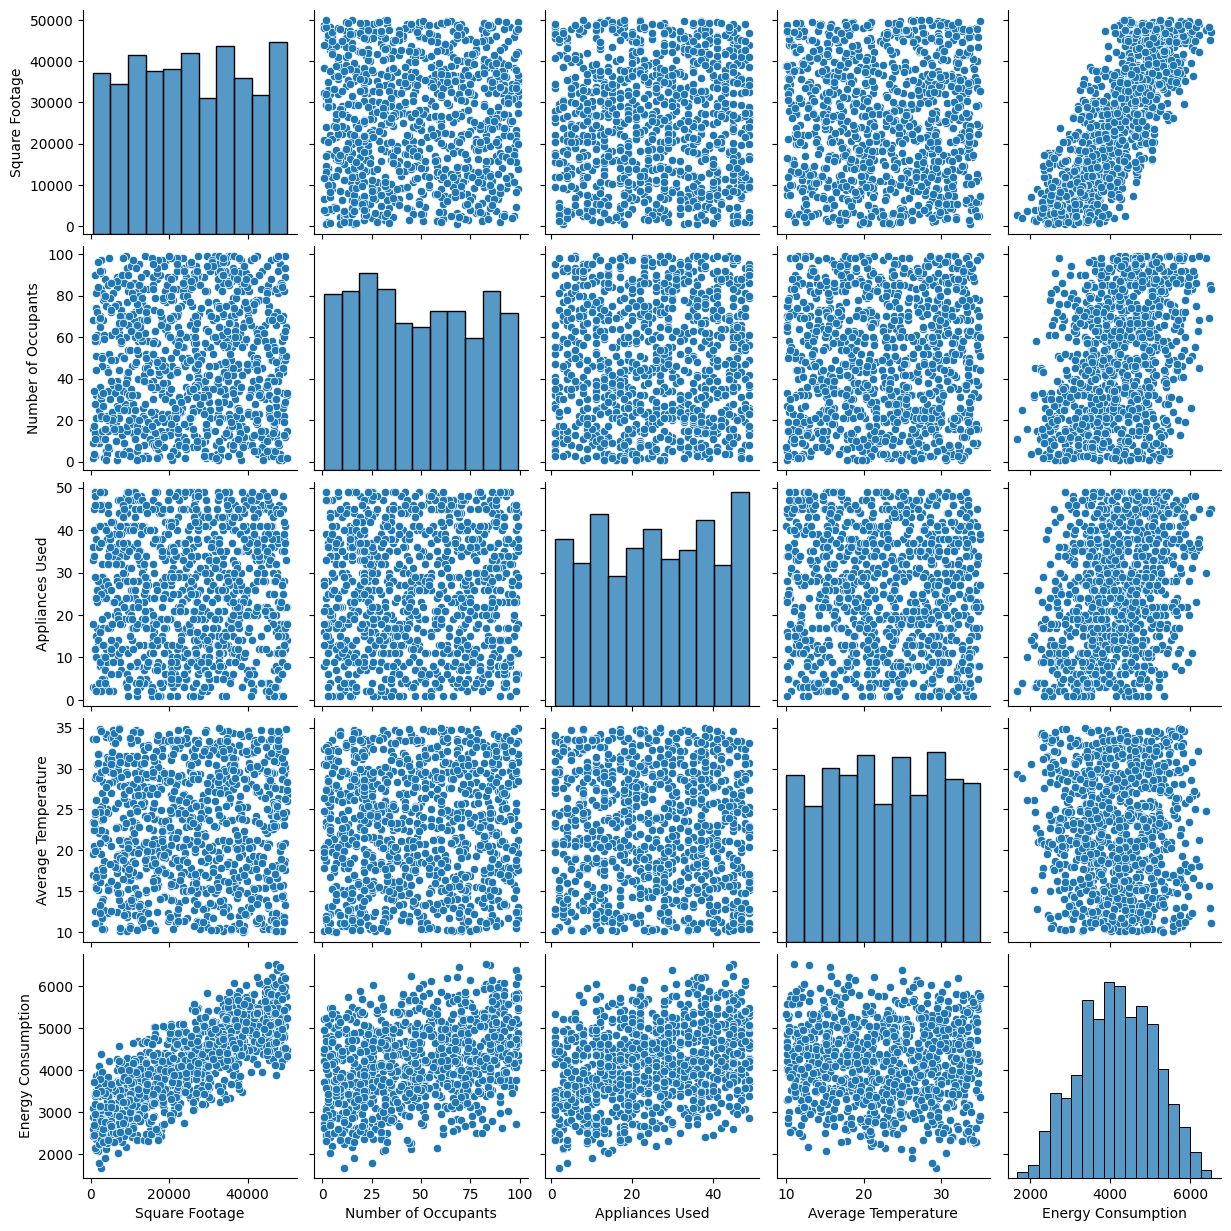

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.pairplot(energy)
plt.show()


<h3>Check outliers </h3>

In [8]:

def detect_outliers_zscore(data, threshold=3):
    mean = np.mean(data)
    std = np.std(data)
    z_scores = (data - mean) / std
    return np.abs(z_scores) > threshold  # Returns True for outliers

outliers_zscore = detect_outliers_zscore(X_feature)

num_outliers = outliers_zscore.sum()
print(f'Number of outliers detected: {num_outliers}')


Number of outliers detected: 98


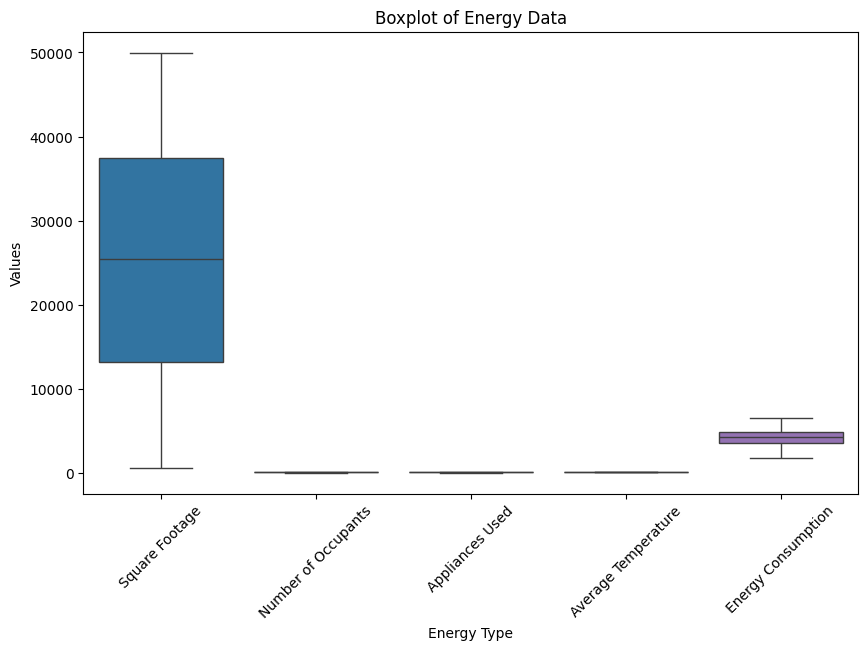

In [9]:
# graph of outliers
plt.figure(figsize=(10, 6))
sns.boxplot(data=energy)
plt.xticks(rotation=45)
plt.title('Boxplot of Energy Data')
plt.xlabel('Energy Type')
plt.ylabel('Values')
plt.show()

<h2><strong> <li> Scale data </li> </strong><h2>

In [10]:
# min-max scale
def scale(xj):
  """
  xj: np(m, 1)
  return: np(m, 1)
  """
  return (xj-xj.mean())/(xj.max()-xj.min())

# standard scale
def standard_scale(xj):
  """
  xj: np(m, 1)
  return: np(m, 1)
  """
  return (xj-xj.mean())/xj.std()


In [11]:
x0 = standard_scale(X_feature[:, 0]).reshape(-1, 1)
x1 = standard_scale(X_feature[:, 1]).reshape(-1, 1)
x2 = standard_scale(X_feature[:, 2]).reshape(-1, 1)
x3 = standard_scale(X_feature[:, 3]).reshape(-1, 1)
y_scale = standard_scale(y_target).reshape(-1, 1)

new_x = np.concatenate((x0, x1, x2, x3), axis=1)

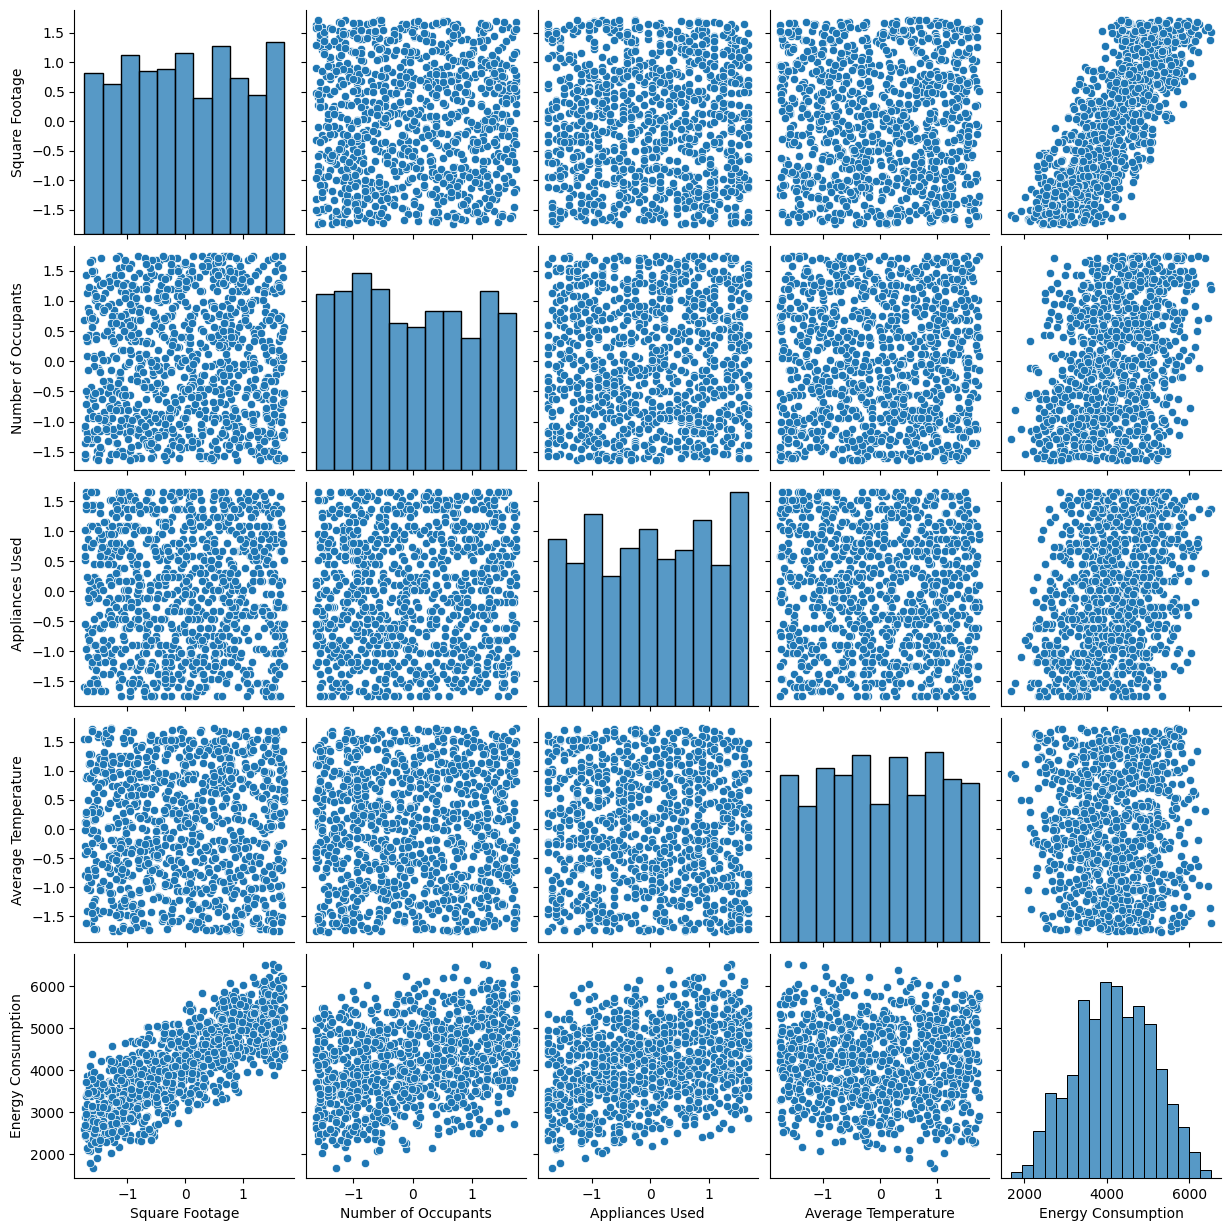

In [12]:
# check the pairplot again
energy["Square Footage"] = new_x[:, 0]
energy["Number of Occupants"] = new_x[:, 1]
energy["Appliances Used"] = new_x[:, 2]
energy["Average Temperature"] = new_x[:, 3]

sns.pairplot(energy)
plt.show()

<h3>Check outliers again after scale </h3>

In [13]:
# checking the outliers
def detect_outliers_zscore(data, threshold=3):
    mean = np.mean(data)
    std = np.std(data)
    z_scores = (data - mean) / std
    return np.abs(z_scores) > threshold  # Returns True for outliers

outliers_zscore = detect_outliers_zscore(new_x)

num_outliers = outliers_zscore.sum()
num_outliers


0

<strong> No outliers Value </strong>

<h2><strong> <li> Check the correlation </li> </strong><h2>

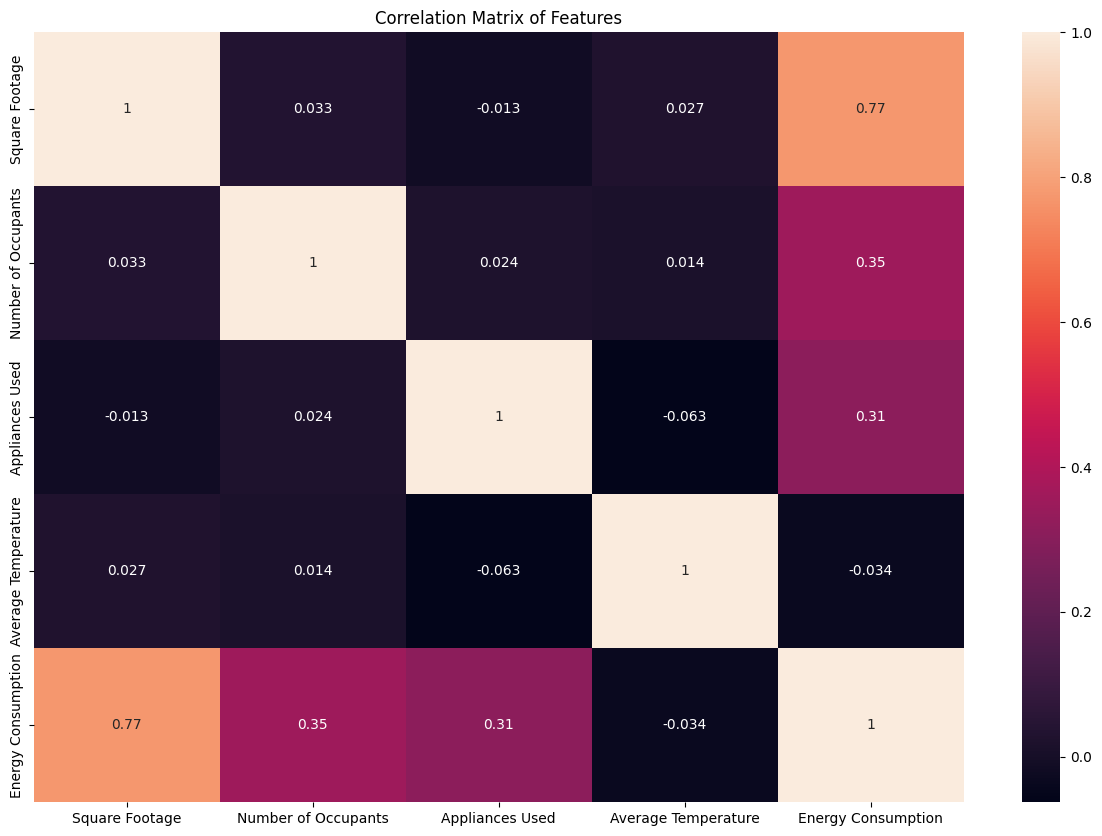

In [14]:
# check the correlation using formula
def correlation(x, y):
  """
  x: np(m, 1)
  y: np(m, 1)
  return: float
  """
  return np.mean((x-x.mean())*(y-y.mean()))/(x.std()*y.std())

correlation_matrix = np.zeros((5, 5))

correlation_matrix[0, 0] = correlation(x0, x0)
correlation_matrix[0, 1] = correlation(x0, x1)
correlation_matrix[0, 2] = correlation(x0, x2)
correlation_matrix[0, 3] = correlation(x0, x3)
correlation_matrix[0, 4] = correlation(x0, y_scale)

correlation_matrix[1, 0] = correlation(x1, x0)
correlation_matrix[1, 1] = correlation(x1, x1)
correlation_matrix[1, 2] = correlation(x1, x2)
correlation_matrix[1, 3] = correlation(x1, x3)
correlation_matrix[1, 4] = correlation(x1, y_scale)

correlation_matrix[2, 0] = correlation(x2, x0)
correlation_matrix[2, 1] = correlation(x2, x1)
correlation_matrix[2, 2] = correlation(x2, x2)
correlation_matrix[2, 3] = correlation(x2, x3)
correlation_matrix[2, 4] = correlation(x2, y_scale)

correlation_matrix[3, 0] = correlation(x3, x0)
correlation_matrix[3, 1] = correlation(x3, x1)
correlation_matrix[3, 2] = correlation(x3, x2)
correlation_matrix[3, 3] = correlation(x3, x3)
correlation_matrix[3, 4] = correlation(x3, y_scale)

correlation_matrix[4, 0] = correlation(y_scale, x0)
correlation_matrix[4, 1] = correlation(y_scale, x1)
correlation_matrix[4, 2] = correlation(y_scale, x2)
correlation_matrix[4, 3] = correlation(y_scale, x3)
correlation_matrix[4, 4] = correlation(y_scale, y_scale)

# plot correlation matrix with features names
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, xticklabels=["Square Footage", "Number of Occupants", "Appliances Used", "Average Temperature", "Energy Consumption"], yticklabels=["Square Footage", "Number of Occupants", "Appliances Used", "Average Temperature", "Energy Consumption"])
plt.title("Correlation Matrix of Features")
plt.show()

<h1><strong> Model Training </strong></h1>

<h2><strong> <li> Feature Selection </li> </strong><h2>

In [15]:
X_final = new_x[:, [0, 1]]
y_final = y_target

In [16]:
# split data into 80/20
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_final, y_final, test_size=0.2, random_state=42)

In [17]:
X_train

array([[ 0.11265951, -1.25215865],
       [-1.09105804, -1.49314377],
       [-0.21245202, -1.38986443],
       ...,
       [ 0.1312773 , -0.39149753],
       [ 0.11384937,  0.7101487 ],
       [-1.43429742, -0.94232065]])

<h2><strong> <li> Build the model and train </li> </strong><h2>

In [18]:
import numpy as np

# Hypothesis function
def h(x1i, x2i, a, b, c):
    return a * x1i + b * x2i + c

# Cost function (Mean Squared Error)
def cost_func(x1, x2, a, b, c, y):
    m = len(x1)  # Number of training samples
    predictions = h(x1, x2, a, b, c)
    cost = np.mean((predictions - y) ** 2)  # Vectorized mean squared error
    return cost

# Gradient of 'a'
def grad_a(x1, x2, a, b, c, y):
    m = len(x1)
    predictions = h(x1, x2, a, b, c)
    return (2 / m) * np.dot((predictions - y), x1)  # Vectorized

# Gradient of 'b'
def grad_b(x1, x2, a, b, c, y):
    m = len(x1)
    predictions = h(x1, x2, a, b, c)
    return (2 / m) * np.dot((predictions - y), x2)  # Vectorized

# Gradient of 'c'
def grad_c(x1, x2, a, b, c, y):
    m = len(x1)
    predictions = h(x1, x2, a, b, c)
    return (2 / m) * np.sum(predictions - y)  # Vectorized


In [19]:
#TRAINING
a, b, c = 0.0, 0.0, 0.0
alpha = 0.1
iterations = 10000
tolerance = 1e-6

# List to store the cost values
costs = []

prev_cost = float('inf')

for i in range(iterations):
    cost = cost_func(X_train[:,0], X_train[:,1], a, b, c, y_train)

    # Store the cost for plotting
    costs.append(cost)

    ga = grad_a(X_train[:,0], X_train[:,1], a, b, c, y_train)
    gb = grad_b(X_train[:,0], X_train[:,1], a, b, c, y_train)
    gc = grad_c(X_train[:,0], X_train[:,1], a, b, c, y_train)

    a += -alpha * ga
    b += -alpha * gb
    c += -alpha * gc

    # Print progress every 1000 iterations
    if i % 100 == 0:
        print(f"{i} => cost: {cost:.6f}, a: {a:.4f}, b: {b:.4f}, c: {c:.4f}")
    
    # Early stopping if cost change is very small
    if i > 0 and abs(prev_cost - cost.item()) < tolerance:
        print(f"Stopping early at iteration {i}")
        break
    
    prev_cost = cost.item()  # Store cost for next iteration

0 => cost: 18088062.864301, a: 138.0289, b: 50.9844, c: 829.5917
Stopping early at iteration 68


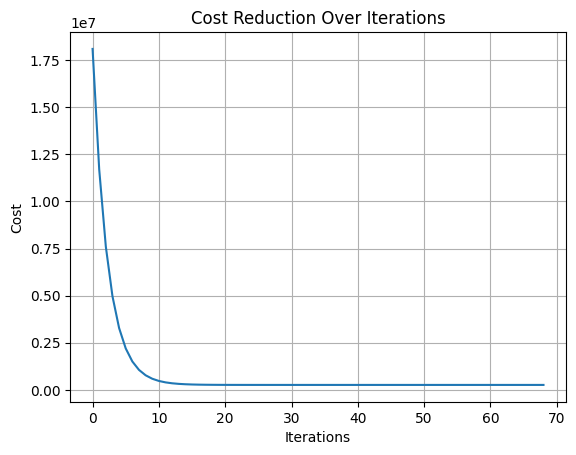

In [20]:
# Plot the cost function reduction
plt.plot(range(len(costs)), costs)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Cost Reduction Over Iterations')
plt.grid(True)
plt.show()

<h2><strong> <li> Evaluate the model </li> </strong><h2>

In [21]:
# Evaluate the model
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

# Make predictions on the test set
y_pred = h(X_test[:,0], X_test[:,1], a, b, c)

# Calculate the mean squared error
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

mse, r2

(217386.44114627238, 0.7330389787781324)

<h2><strong> <li> Predict with unseen data </li> </strong><h2>

In [22]:
test_energy = pd.read_csv("test_energy_data.csv")

# Fix scaling issue (flatten to avoid array-in-cell problem)
test_energy["Square Footage"] = standard_scale(test_energy["Square Footage"].values).flatten()
test_energy["Number of Occupants"] = standard_scale(test_energy["Number of Occupants"].values).flatten()

# Ensure test_energy_final is a proper NumPy array
test_energy_final = test_energy.iloc[:, [1, 2]].to_numpy(dtype=float)

# Predict
predictions = [h(x1, x2, a, b, c) for x1, x2 in test_energy_final]

# Add predictions back to DataFrame
test_energy["prediction"] = predictions

# Display results
test_energy.head(10)


,Building Type,Square Footage,Number of Occupants,Appliances Used,Average Temperature,Day of Week,Energy Consumption,prediction
0,Residential,-0.096678,-1.083157,4,28.52,Weekday,2865.57,3752.372417
1,Commercial,0.124691,0.294734,23,23.07,Weekend,4283.80,4341.841979
2,Commercial,1.424321,-1.452835,44,33.56,Weekday,5067.83,4697.074625
3,Residential,1.153986,1.235733,17,27.39,Weekend,4624.30,5357.186718
4,Residential,0.794444,0.361948,47,17.08,Weekday,4820.59,4830.438096
5,Industrial,0.390335,-0.007730,28,22.82,Weekday,5026.23,4431.731696
6,Residential,0.978210,-0.982335,44,23.36,Weekend,4404.56,4534.295918
7,Residential,-1.324400,-0.881514,19,27.27,Weekday,2394.37,2959.282340
8,Industrial,-0.395820,-0.780693,16,23.00,Weekend,3969.09,3639.106173
9,Industrial,-0.355651,1.437375,35,12.96,Weekday,5136.69,4367.365517


## <span style="color:#4A90E2;">🚀 Project Conclusion</span>  

---

<div style="background-color:#F5F7FA; padding:10px; border-radius:8px; border-left:5px solid #4A90E2;">
    <p><strong>🔹 R² Score:</strong> <span style="color:#D35400;">0.733</span></p>
    <p><strong>🔹 Mean Squared Error (MSE):</strong> <span style="color:#D35400;">217,386.44</span></p>
</div>

✅ This result indicates a <span style="color:#27AE60;"><strong>fairly good model performance</strong></span> so far.  
📌 While there is still room for improvement, the current outcome is <span style="color:#2C3E50;"><em>promising</em></span> for this dataset.  

---

<hr />

# **Check with 3 Features**  

---

After analyzing the correlation with the target variable, we found that three features have the highest correlation. I initially selected the top two, but since **"Number of Occupants"** and **"Appliances Used"** do not exhibit high correlation with each other based on the correlation plot, we can include all three features.  

> **_If two features have a high correlation, we can't choose both as predictors since it can lead to multicollinearity._**  

---

To further investigate, I will now train the model with all three features, including **"Appliances Used"**, to see if it improves performance.  


In [23]:
energy.head()

,Building Type,Square Footage,Number of Occupants,Appliances Used,Average Temperature,Day of Week,Energy Consumption
0,Residential,-1.287805,0.951134,-1.106957,1.012925,Weekday,2713.95
1,Commercial,1.323516,0.606869,1.375645,-0.825544,Weekday,5744.99
2,Industrial,-0.434466,-0.391498,-0.610436,-1.164652,Weekend,4101.24
3,Residential,-0.853716,-1.183306,1.091919,1.430504,Weekday,3009.14
4,Commercial,-0.846017,-0.770188,-0.539505,-1.498155,Weekday,3279.17


In [24]:
# Choose the square footage, number of occupants and appliances used as features
X = energy[['Square Footage', 'Number of Occupants', 'Appliances Used']].values
y = energy['Energy Consumption'].values

# split data into 80/20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

<h2><strong> <li> New linear regression model with 3 feature </li> </strong><h2>

In [25]:
# Train the model 

# Hypothesis function
def h(x1i, x2i, x3i, a, b, c, d):
    return a * x1i + b * x2i + c * x3i + d

# Cost function (Mean Squared Error)
def cost_func(x1, x2, x3, a, b, c, d, y):
    m = len(x1)  # Number of training samples
    predictions = h(x1, x2, x3, a, b, c, d)
    cost = np.mean((predictions - y) ** 2)  # Vectorized mean squared error
    return cost

# Gradient of 'a'
def grad_a(x1, x2, x3, a, b, c, d, y):
    m = len(x1)
    predictions = h(x1, x2, x3, a, b, c, d)
    return (2 / m) * np.dot((predictions - y), x1)  # Vectorized

# Gradient of 'b'
def grad_b(x1, x2, x3, a, b, c, d, y):
    m = len(x1)
    predictions = h(x1, x2, x3, a, b, c, d)
    return (2 / m) * np.dot((predictions - y), x2)  # Vectorized

# Gradient of 'c'
def grad_c(x1, x2, x3, a, b, c, d, y):
    m = len(x1)
    predictions = h(x1, x2, x3, a, b, c, d)
    return (2 / m) * np.dot((predictions - y), x3)  # Vectorized

# Gradient of 'd'
def grad_d(x1, x2, x3, a, b, c, d, y):
    m = len(x1)
    predictions = h(x1, x2, x3, a, b, c, d)
    return (2 / m) * np.sum(predictions - y)  # Vectorized

In [26]:
# TRAINING
a, b, c, d = 0.0, 0.0, 0.0, 0.0
alpha = 0.1
iterations = 10000
tolerance = 1e-6

# List to store the cost values
costs = []

prev_cost = float('inf')

for i in range(iterations):
    cost = cost_func(X_train[:,0], X_train[:,1], X_train[:,2], a, b, c, d, y_train)

    # Store the cost for plotting
    costs.append(cost)

    ga = grad_a(X_train[:,0], X_train[:,1], X_train[:,2], a, b, c, d, y_train)
    gb = grad_b(X_train[:,0], X_train[:,1], X_train[:,2], a, b, c, d, y_train)
    gc = grad_c(X_train[:,0], X_train[:,1], X_train[:,2], a, b, c, d, y_train)
    gd = grad_d(X_train[:,0], X_train[:,1], X_train[:,2], a, b, c, d, y_train)

    a += -alpha * ga
    b += -alpha * gb
    c += -alpha * gc
    d += -alpha * gd

    # Print progress every 100 iterations
    if i % 100 == 0:
        print(f"{i} => cost: {cost:.6f}, a: {a:.4f}, b: {b:.4f}, c: {c:.4f}, d: {d:.4f}")
    
    # Early stopping if cost change is very small
    if i > 0 and abs(prev_cost - cost.item()) < tolerance:
        print(f"Stopping early at iteration {i}")
        break
    
    prev_cost = cost.item()  # Store cost for next iteration

0 => cost: 18088062.864301, a: 138.0289, b: 50.9844, c: 54.0334, d: 829.5917
Stopping early at iteration 68


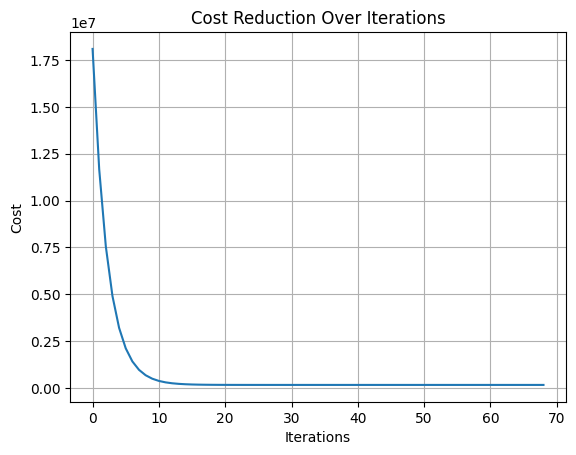

In [27]:
# Plot the cost function reduction
plt.plot(range(len(costs)), costs)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Cost Reduction Over Iterations')
plt.grid(True)
plt.show()

In [29]:
# Evaluate the model

# Make predictions on the test set
y_pred = h(X_test[:,0], X_test[:,1], X_test[:,2], a, b, c, d)

# Calculate the mean squared error
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

mse, r2


(170679.14961765186, 0.7903977826632285)